IS6400 21/22 Semester B

- Homework exercises of Week 6 to Week 8

Zhiya Zuo (zhiyazuo@cityu.edu.hk)

Department of Information Systems

City University of Hong Kong

__NOTE__: This is a notebook of the homework exercises for materials from Week 6 to Week 8.

---

In [2]:
import numpy as np
import pandas as pd

In [16]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [32]:
import statsmodels.api as sm

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

---

# Prediction via Regression [40%]

## Concepts [20%]

- Regression as a word means _towards the population average_. How do you find the ordinary least square consistent with _regression_? HINT: recall what error linear regression is trying to minimize? __[5%]__

- What is overfitting? Describe in your own words __[5%]__

- In a linear regression model, what are our solutions to overfitting? Please at least name two linear regression models and explain how they solve overfitting. __[5%x2]__

## Hands-on Applications [20%]

Read the dataset `cpu.csv` using `pandas.read_csv` to conduct the following analysis:

Dat source: https://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

In [7]:
cpu_data = pd.read_csv('cpu.csv')
cpu_data.head()

,MYCT,MMIN,MMAX,CAH,CHMIN,CHMAX,y
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


1. Spilt the dataset into training and testing randomly with 80% being training set. __[4%]__
    - HINT: use `numpy.random.choice` as shown in Week 6 slides or `sklearn.model_selection.train_test_split` following this [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [8]:
X, y = cpu_data.loc[:, cpu_data.columns[:-1]].values, cpu_data['y'].values
X.shape, y.shape

((209, 6), (209,))

In [13]:
# using numpy
N_train = int(0.8 * X.shape[0])
train_indices = np.random.choice(np.arange(X.shape[0]), size=N_train, replace=False)
test_indices = np.array([idx for idx in np.arange(X.shape[0]) if idx not in train_indices])
print('Training size: %i; Testing size: %i'%(train_indices.size, test_indices.size))
X_train, y_train = X[train_indices, :], y[train_indices] 
X_test, y_test = X[test_indices, :], y[test_indices] 

Training size: 167; Testing size: 42


In [14]:
# using sklearn
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=0.2)
print('Training size: %i; Testing size: %i'%(y_train.size, y_test.size))

Training size: 167; Testing size: 42


2. (a) Use a multiple linear regression to predict the target variable `y` __[2%]__ and (b) print out the training error and testing error (mean squared error). __[2%]__

In [17]:
linreg = linear_model.LinearRegression().fit(X_train, y_train)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=linreg.predict(X_train))
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=linreg.predict(X_test))
print('Training error: %.3f; Testing error: %.3f'%(mse_train, mse_test))

Training error: 3612.883; Testing error: 3588.197


3. Let's now:
    1. Apply both ridge regression and the linear regression models. You can set the hyperparemter in the ridge regression to 0.1. __[6%]__
    2. Use 5-fold cross validation and compare the test error (prediction error on the held-out test set) between these two models. __[6%]__

In [18]:
kf = model_selection.KFold(n_splits=5)
linreg_error = list()
ridge_error = list()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linreg = linear_model.LinearRegression().fit(X_train, y_train)
    linreg_pred = linreg.predict(X_test)
    ridge = linear_model.Ridge(alpha=0.1).fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    linreg_error.append(metrics.mean_squared_error(y_true=y_test, y_pred=linreg_pred))
    ridge_error.append(metrics.mean_squared_error(y_true=y_test, y_pred=ridge_pred))

In [21]:
np.mean(linreg_error), np.mean(ridge_error)

(6383.656697342961, 6383.602200082355)

---

# Time Series Forecasting [60%]

## Concepts [25%]

- What is delphi method? __[5%]__
    - _[Your answer goes here]_

- What does autocorrelation capture for a time series dataset? __[5%]__
    - _[Your answer goes here]_ 

- What are the three components in a time series dataset? __[5%]__
    - _[Your answer goes here]_

- What does it mean for a time series to be stationary? __[5%]__
    - _[Your answer goes here]_

- What are the common approaches to data partioning for forecast performance evaluation? Provide two methods __[2.5%x2]__
    - _[Your answer goes here]_

## Hands-on [35%]

Read the data from this [lnik](https://raw.githubusercontent.com/robjhyndman/ETC3550Slides/fable/data/ausbeer.csv) using `pandas.read_csv` and conduct the following analysis:

In [46]:
url = 'https://raw.githubusercontent.com/robjhyndman/ETC3550Slides/fable/data/ausbeer.csv'
beer_data = pd.read_csv(url, date_parser='Time')
beer_data.head(2)

,Time,Production
0,1956-01-01,284
1,1956-04-01,213


1. Visualize the time series data using line plot (x-axis is time and y is time series value). To reduce the number of `xticks`, use `ax.xaxis.set_major_locator(plt.MaxNLocator(5))` or follow the code in Week 7 Jupyter notebook. __[2%]__

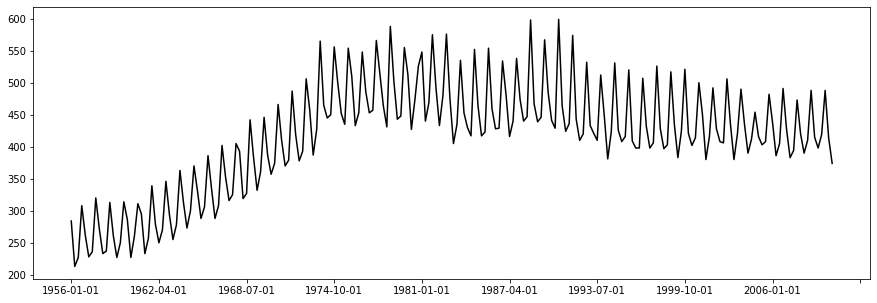

In [47]:
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(beer_data['Time'], beer_data['Production'], color='k')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

2. Please answer the two questions:
    1. Do you think it is stationary? Why? __[2%]__
    1. Confirm with the KPSS test (you need to use `statsmodels` and check the p value of the returned statistics). HINT: read [link](https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.kpss.html) on the `kpss` test. __[3%]__

No it is not. There is a clear trend and seasonality within year as well. Confirmaiton with a KPSS test:

In [48]:
_, pval, __, ___ = sm.tsa.kpss(beer_data.Production, nlags='auto')
print('p Value to the KPSS test is: %.3f'%pval)

p Value to the KPSS test is: 0.010


/Users/zhiyzuo/.virtualenvs/py3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


3. Please use the `STL` decomposition to compose the time series into sub-components. Use the API from `statsmodels` to visualize the components. Note that you need to use the `resample` function to set the period of the data after making it a series with the index being `datetime`. You can refer to the code in Week 7 Jupyter notebook. __[5%]__

In [49]:
beer_data = beer_data.set_index('Time')['Production']
beer_data.index = pd.to_datetime(beer_data.index)
beer_data = beer_data.resample('Q').mean()
beer_data.head()

Time
1956-03-31    284.0
1956-06-30    213.0
1956-09-30    227.0
1956-12-31    308.0
1957-03-31    262.0
Freq: Q-DEC, Name: Production, dtype: float64

In [50]:
stl_decomp = sm.tsa.STL(beer_data).fit()
stl_trend = stl_decomp.trend
stl_seasonal = stl_decomp.seasonal
stl_resid= stl_decomp.resid
stl_lines = {'Data': beer_data,
             'Seasonal': stl_seasonal,
             'Trend': stl_trend,
             'Remainder': stl_resid}

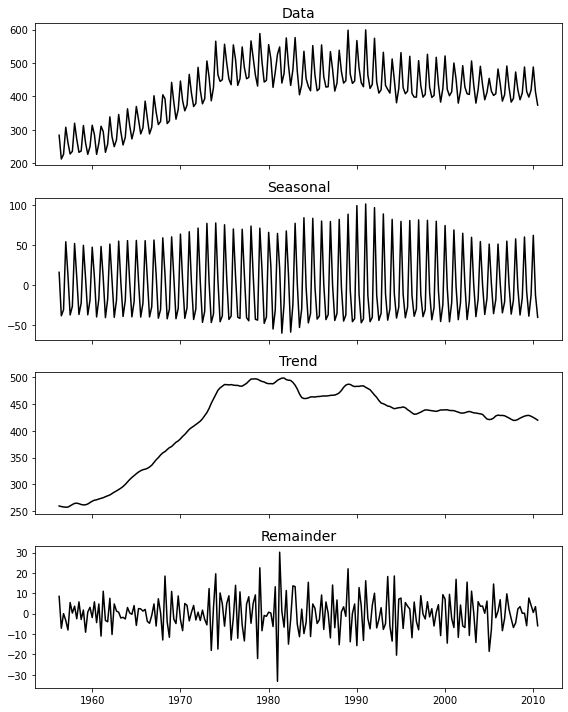

In [51]:
fig, ax_arr = plt.subplots(nrows=4, figsize=[8, 10], sharex=True, sharey=False)
for i, (y_lab, y_val) in enumerate(stl_lines.items()):
    ax = ax_arr.flat[i]
    ax.plot(y_val, color='k')
    ax.set_title(y_lab, size=14)
fig.tight_layout()

4. Conduct forecasting using data up till 2004 as training and the remaining data as test (i.e., fixed partitioning). Use Holt-Winter's method (i.e., exponential smoothing with trend and seasonality) __[6%]__.
    1. Please add a damping factor to the trend component. __[2%]__
    1. Please visualize in a figure with lines of different colors: __[1%x3]__
        - The observation (ground truth)
        - The fitted line (on training data)
        - The predicted line (on testing data)
    1. Compare the training and testing error __[2%]__

5. Conduct forecasting similar as above but use an ARIMA model. __[5%]__
    1. Compare the testing error between ARIMA and Holt-Winter's using the mean squared error. __[3%]__
    2. Visualize the fitted and predicted lines from ARIMA on top of the previous figure you have built. __[2%]__